In [1]:
%load_ext rpy2.ipython

In [2]:
#!gist -p Test_dn_data2013_all2000Genes.ipynb

In [3]:
!gist -u https://gist.github.com/ed248343dd87c54617a1 Test_dn_data2013_all2000Genes.ipynb

https://gist.github.com/ed248343dd87c54617a1


##LoF

In [4]:
%%R
library("data.table")
d.cc.lof <- fread("/usr/data/Documents/SaveDataFromServer/CombinedDataThreeDiseases/grid.dn.lof.all20000.data2013.txt")


cLLK <- dim(d.cc.lof)[2]

d.cc.lof[[cLLK]] <- -d.cc.lof[[cLLK]]

colNames <- c("pi", "gamma.mean.dn", "beta.dn", "logLKL")
#full.cc.LoF.rho[, cLLK] <- -full.cc.LoF.rho[, cLLK]
getwd()

data.table 1.9.4  For help type: ?data.table
*** NB: by=.EACHI is now explicit. See README to restore previous behaviour.
[1] "/usr/data/Documents/GitHub/TestR/HBproject/extTADA"


In [5]:
%%R
print(dim(d.cc.lof))
head(d.cc.lof)

[1] 119700      4
      V1 V2  V3        V4
1: 0.031  1 0.2 -676.4160
2: 0.031  1 0.4 -676.6841
3: 0.031  1 0.6 -676.7828
4: 0.031  1 0.8 -676.8341
5: 0.031  1 1.0 -676.8656
6: 0.031  1 1.2 -676.8869


In [6]:
%%R
library("ggplot2")

#d.cc.lof[plot(V1, -V8, xlab = 'pi')]

#p1 <- ggplot(d.cc.lof,aes(x= V1, y = -V8, group = V2)) + geom_point()
#print(p1)

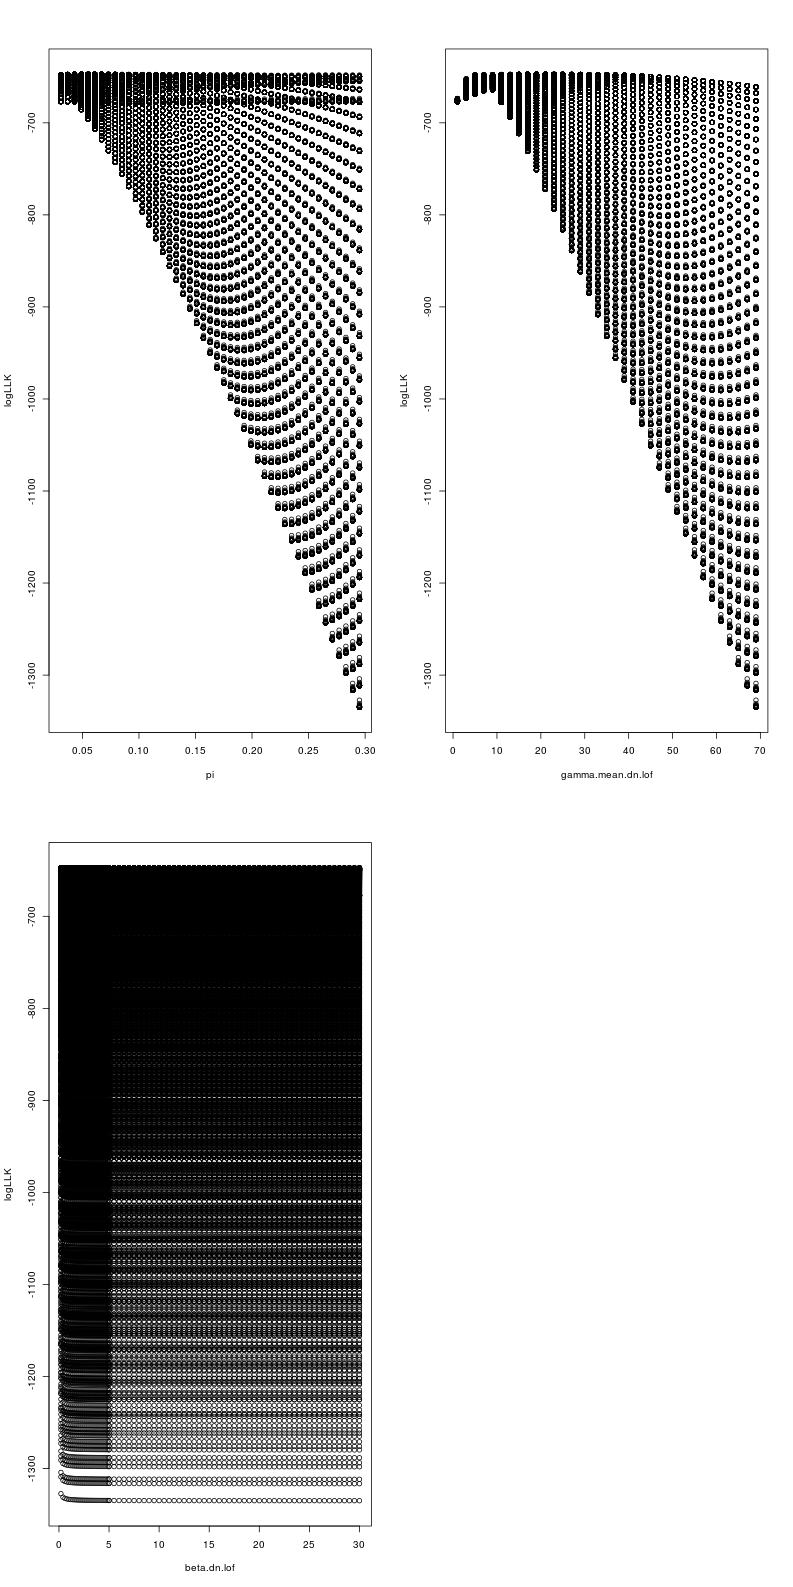

In [7]:
%%R -w 28 -h 56 -u cm
nameCol <- c("pi", "gamma.mean.dn.lof", "beta.dn.lof", "rho1.lof")

par(mfrow = c(2, 2))
for (ii in 1:(cLLK -1)){
    
    plot(d.cc.lof[[ii]], d.cc.lof[[cLLK]], xlab = nameCol[ii], ylab = 'logLLK')
}

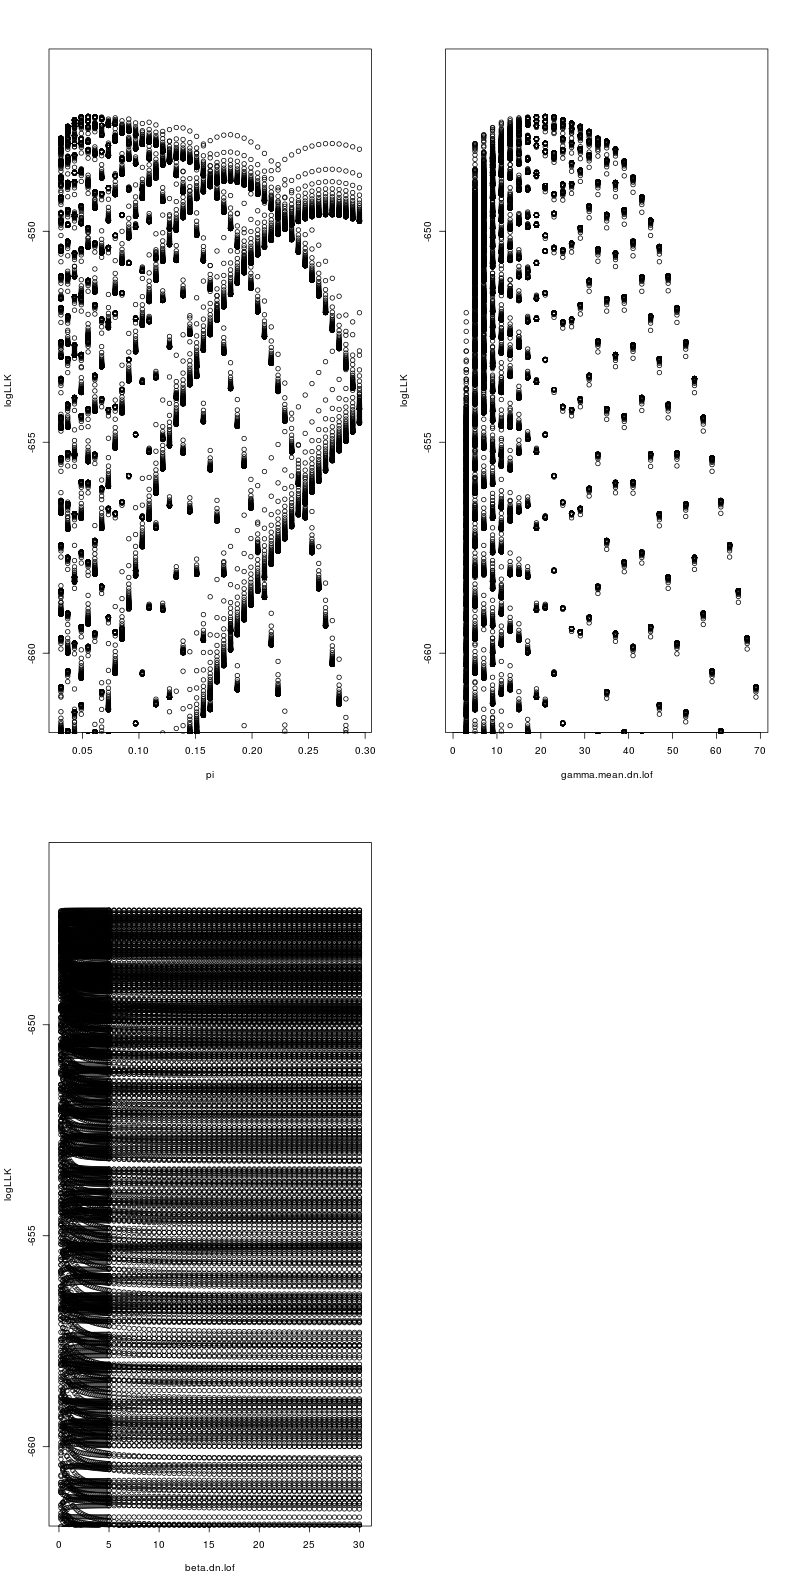

In [8]:
%%R -w 28 -h 56 -u cm
uLimit <- max(d.cc.lof[[cLLK]]) + 1
lLimit <- uLimit - 15
d.cc.lof.1 <- d.cc.lof[V4>=lLimit]
par(mfrow = c(2, 2))
for (ii in 1:(cLLK -1)){
    plot(d.cc.lof[[ii]], d.cc.lof[[cLLK]], xlab = nameCol[ii], ylab = 'logLLK', ylim = c(lLimit, uLimit))
}

In [9]:
%%R
d.cc.lof.1[order(V4)]

          V1 V2   V3        V4
    1: 0.073  5  6.0 -661.2789
    2: 0.049 47  0.8 -661.2752
    3: 0.163 15  1.8 -661.2734
    4: 0.073  5  5.5 -661.2720
    5: 0.157  3  3.4 -661.2717
   ---                        
29549: 0.055 21 28.0 -647.2797
29550: 0.055 21 28.5 -647.2797
29551: 0.055 21 29.0 -647.2797
29552: 0.055 21 29.5 -647.2797
29553: 0.055 21 30.0 -647.2797


###Set limit for the proportion of protective variants and the frequency of variants

In [10]:
%%R
d.cc.lof.1 <- d.cc.lof[pgamma(1, V2*V3, rate = V3) < 0.0000017]

#d.cc.lof.1 <- d.cc.lof.1[V4/V5 <= V6/V7]

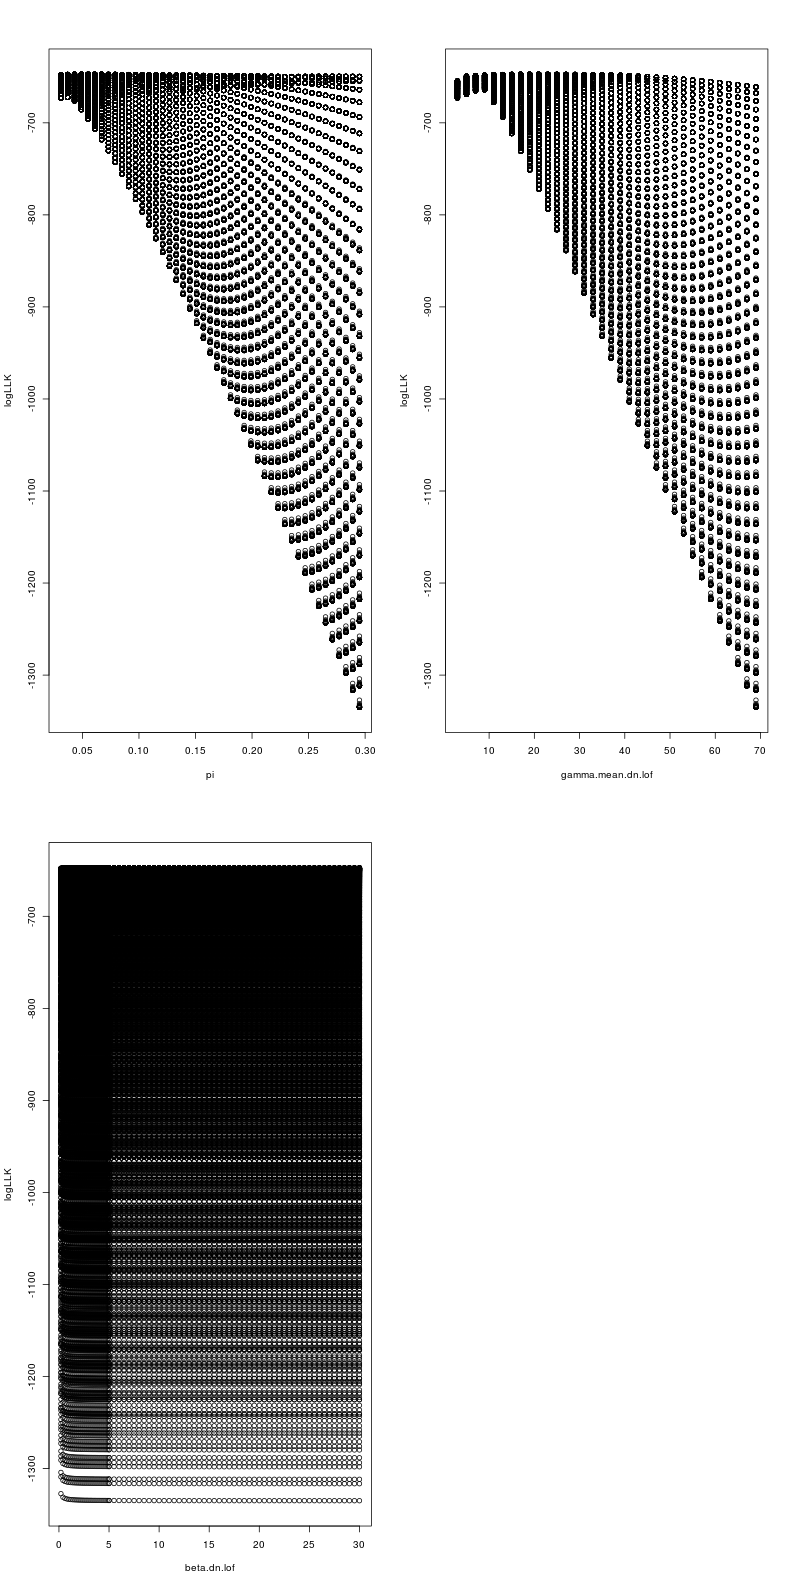

In [11]:
%%R -w 28 -h 56 -u cm

par(mfrow = c(2, 2))
for (ii in 1:(cLLK -1)){
    plot(d.cc.lof.1[[ii]], d.cc.lof.1[[cLLK]], xlab = nameCol[ii], ylab = 'logLLK')
}

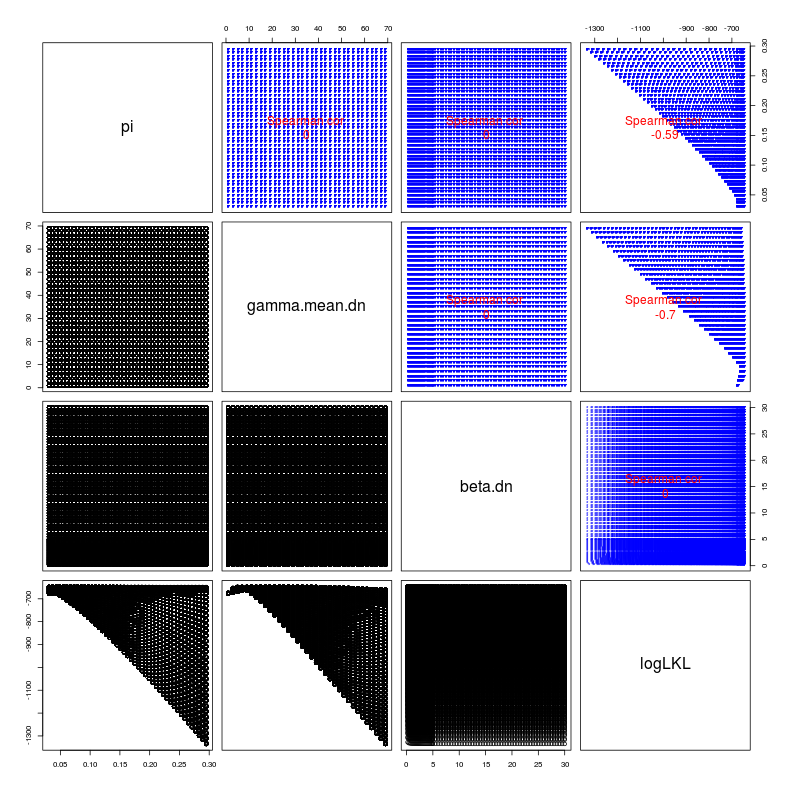

In [12]:
%%R -w 28 -h 28 -u cm

textPanel <- function(x, y) {
    tText <- paste("Spearman cor \n", round(cor(x, y, method = "spearman"), 2), sep = "")
    text(x, y, "*", lwd = 0.5, cex = 0.8, col = 'blue')
    text(mean(range(x)), mean(range(y)), tText , cex = 1.5, lwd = 2, col = 'red')
}

pairs(d.cc.lof, labels = colNames, upper.panel = textPanel)


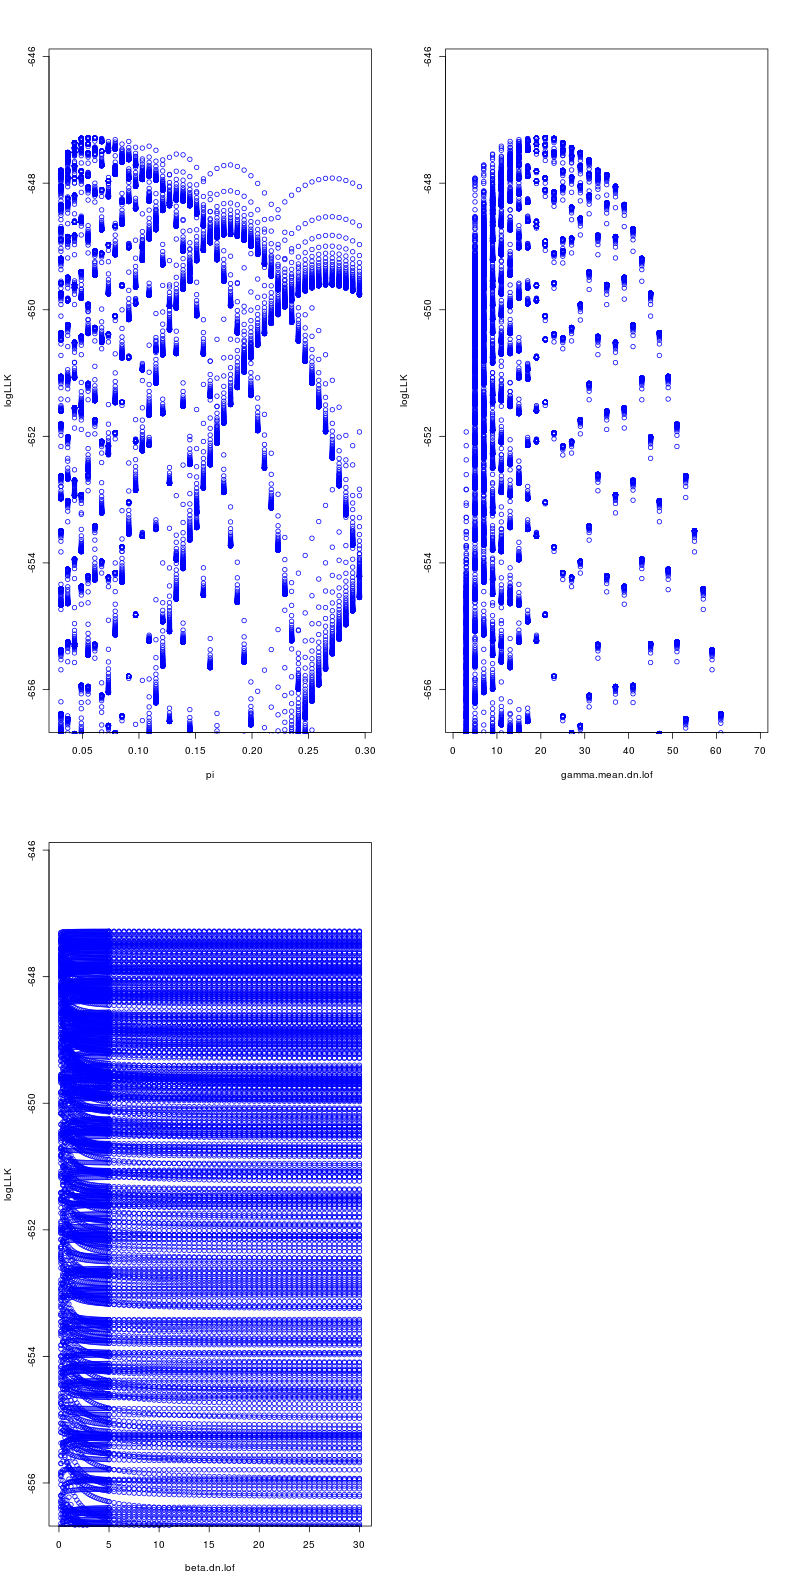

In [13]:
%%R -w 28 -h 56 -u cm
uLimit <- max(d.cc.lof.1[[cLLK]]) + 1
lLimit <- uLimit - 10
d.cc.lof.1 <- d.cc.lof.1[V4>=lLimit]
par(mfrow = c(2, 2))
for (ii in 1:(cLLK -1)){
    plot(d.cc.lof[[ii]], d.cc.lof[[cLLK]], xlab = nameCol[ii], ylab = 'logLLK', 
         ylim = c(lLimit, uLimit), col = 'blue')
}

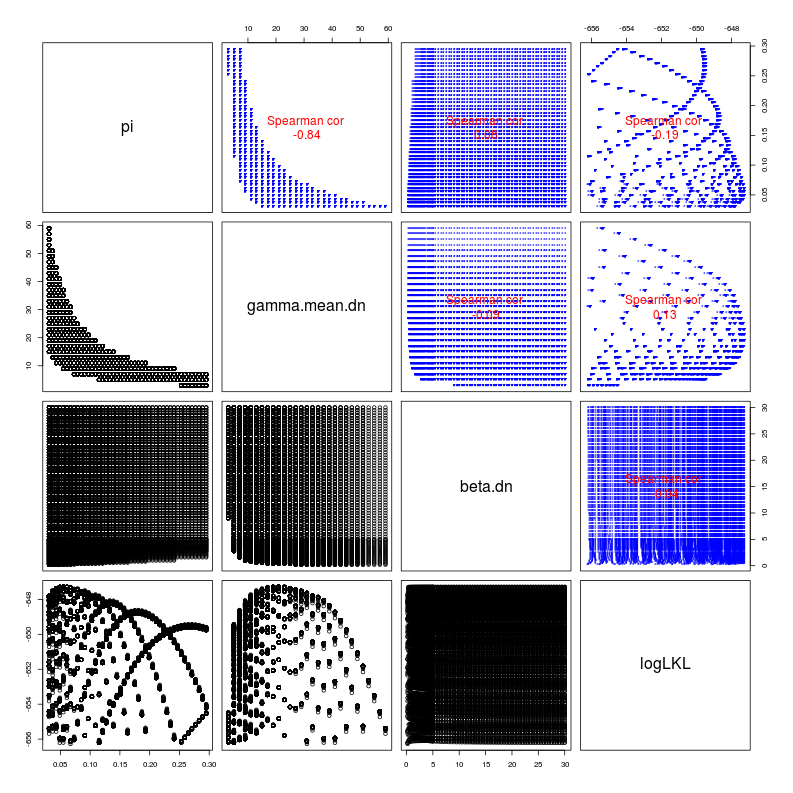

In [14]:
%%R -w 28 -h 28 -u cm

textPanel <- function(x, y) {
    tText <- paste("Spearman cor \n", round(cor(x, y, method = "spearman"), 2), sep = "")
    text(x, y, "*", lwd = 0.5, cex = 0.8, col = 'blue')
    text(mean(range(x)), mean(range(y)), tText , cex = 1.5, lwd = 2, col = 'red')
}

pairs(d.cc.lof.1, labels = colNames, upper.panel = textPanel)



In [15]:
%%R
head(d.cc.lof.1[order(V4)], 20)


       V1 V2   V3        V4
 1: 0.067 31  0.2 -656.2747
 2: 0.115  5 30.0 -656.2106
 3: 0.115  5 29.5 -656.2103
 4: 0.115  5 29.0 -656.2100
 5: 0.115  5 28.5 -656.2097
 6: 0.115  5 28.0 -656.2093
 7: 0.115  5 27.5 -656.2090
 8: 0.115  5 27.0 -656.2087
 9: 0.115  5 26.5 -656.2083
10: 0.115  5 26.0 -656.2079
11: 0.115  5 25.5 -656.2075
12: 0.115  5 25.0 -656.2071
13: 0.115  5 24.5 -656.2067
14: 0.115  5 24.0 -656.2063
15: 0.049 41  0.2 -656.2062
16: 0.115  5 23.5 -656.2058
17: 0.115  5 23.0 -656.2053
18: 0.115  5 22.5 -656.2048
19: 0.115  5 22.0 -656.2043
20: 0.115  5 21.5 -656.2038


In [16]:
#!gist -p Test_dn_data2013_all2000Genes.ipynb

In [17]:
!gist -u https://gist.github.com/1f1347faf77092349162 Test_dn_data2013_all2000Genes.ipynb

https://gist.github.com/1f1347faf77092349162


##MIS3

In [18]:
%%R
library("data.table")

d.cc.mis3 <- fread("/usr/data/Documents/SaveDataFromServer/CombinedDataThreeDiseases/grid.dn.mis3.all20000.data2013.txt")



cLLK1 <- dim(d.cc.mis3)[2]
d.cc.mis3 <- d.cc.mis3[V4 != "NA"]
d.cc.mis3[[cLLK1]] <- -d.cc.mis3[[cLLK1]]
#full.cc.LoF.rho[, cLLK] <- -full.cc.LoF.rho[, cLLK]
getwd()

[1] "/usr/data/Documents/GitHub/TestR/HBproject/extTADA"


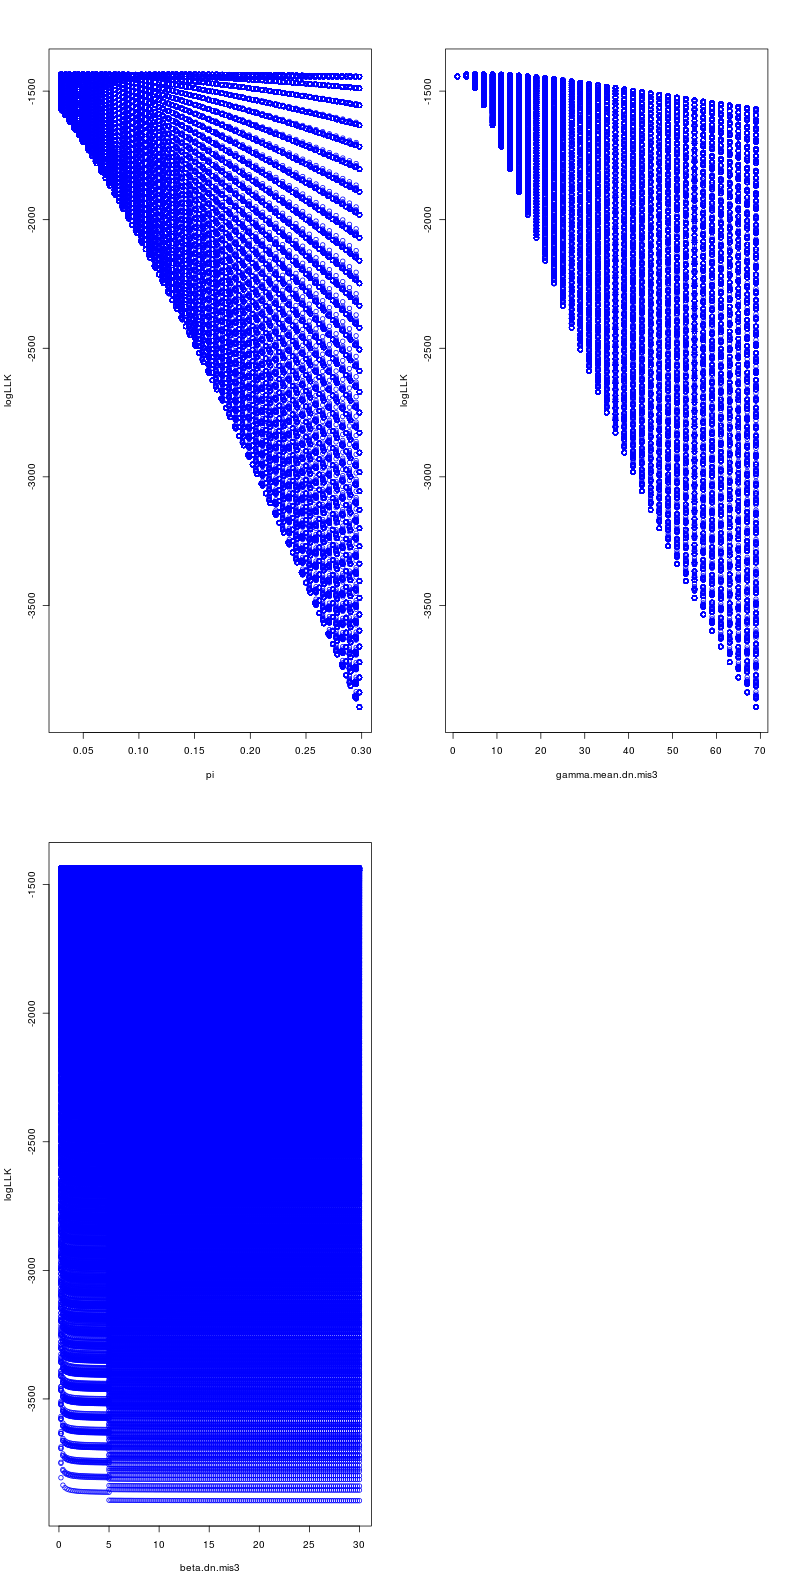

In [19]:
%%R -w 28 -h 56 -u cm
nameCol <- c("pi", "gamma.mean.dn.mis3", "beta.dn.mis3")

par(mfrow = c(2, 2))
for (ii in 1:(cLLK1 -1)){
    
    plot(d.cc.mis3[[ii]], d.cc.mis3[[cLLK1]], xlab = nameCol[ii], ylab = 'logLLK', col = 'blue')
}

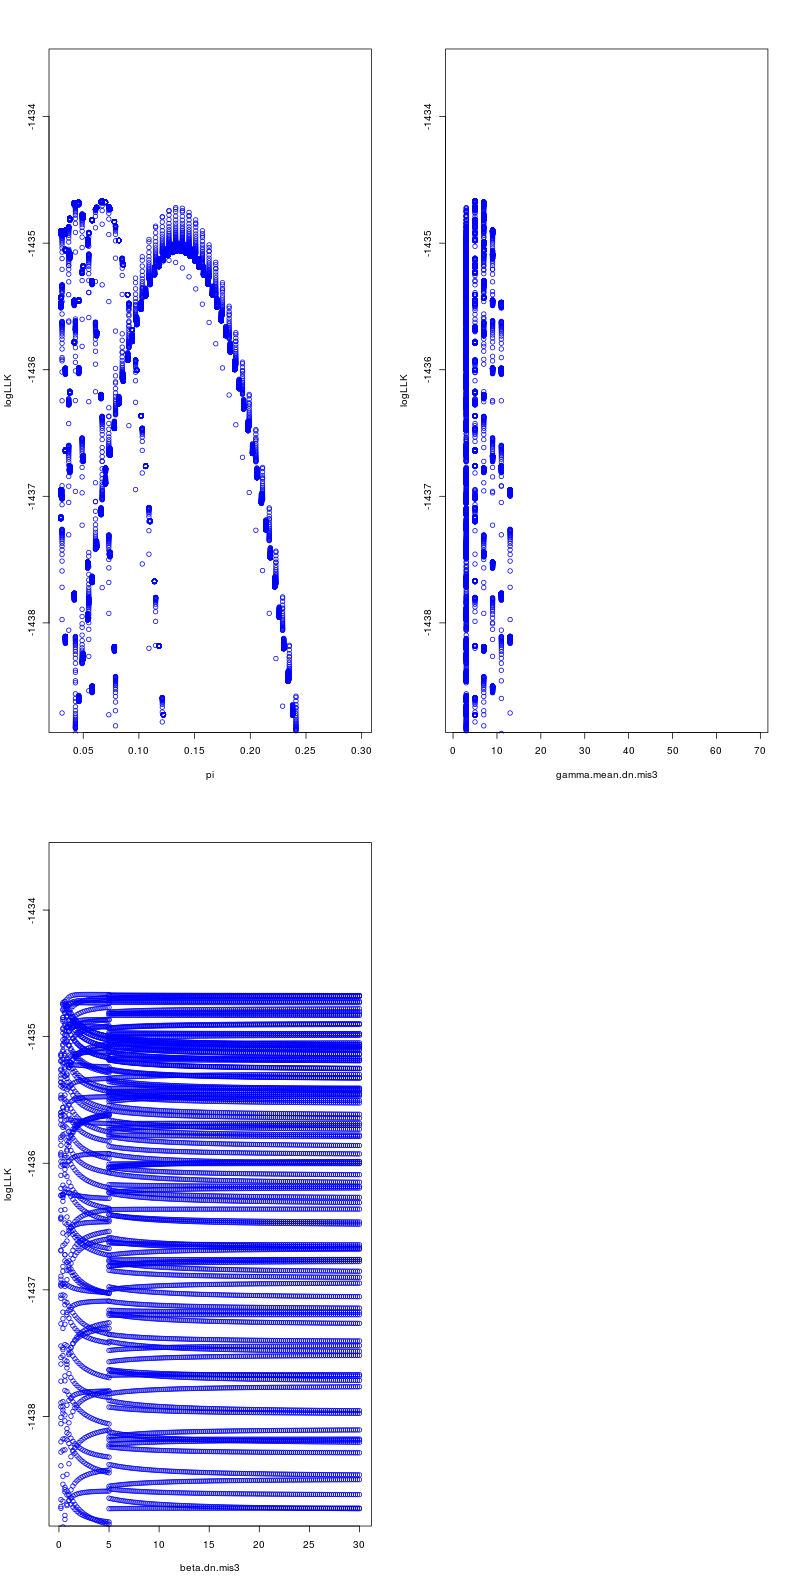

In [20]:
%%R -w 28 -h 56 -u cm
uLimit <- max(d.cc.mis3[[cLLK1]]) + 1
lLimit <- uLimit - 5

par(mfrow = c(2, 2))
for (ii in 1:(cLLK1 -1)){
    plot(d.cc.mis3[[ii]], d.cc.mis3[[cLLK1]], xlab = nameCol[ii], ylab = 'logLLK', ylim = c(lLimit, uLimit),
        col = 'blue')
}

###Set limit

In [21]:
%%R
d.cc.mis3.1 <- d.cc.mis3[pgamma(1, V2*V3, rate = V3) < 0.0002]

#d.cc.mis3.1 <- d.cc.mis3.1[V4/V5 <= V6/V7]

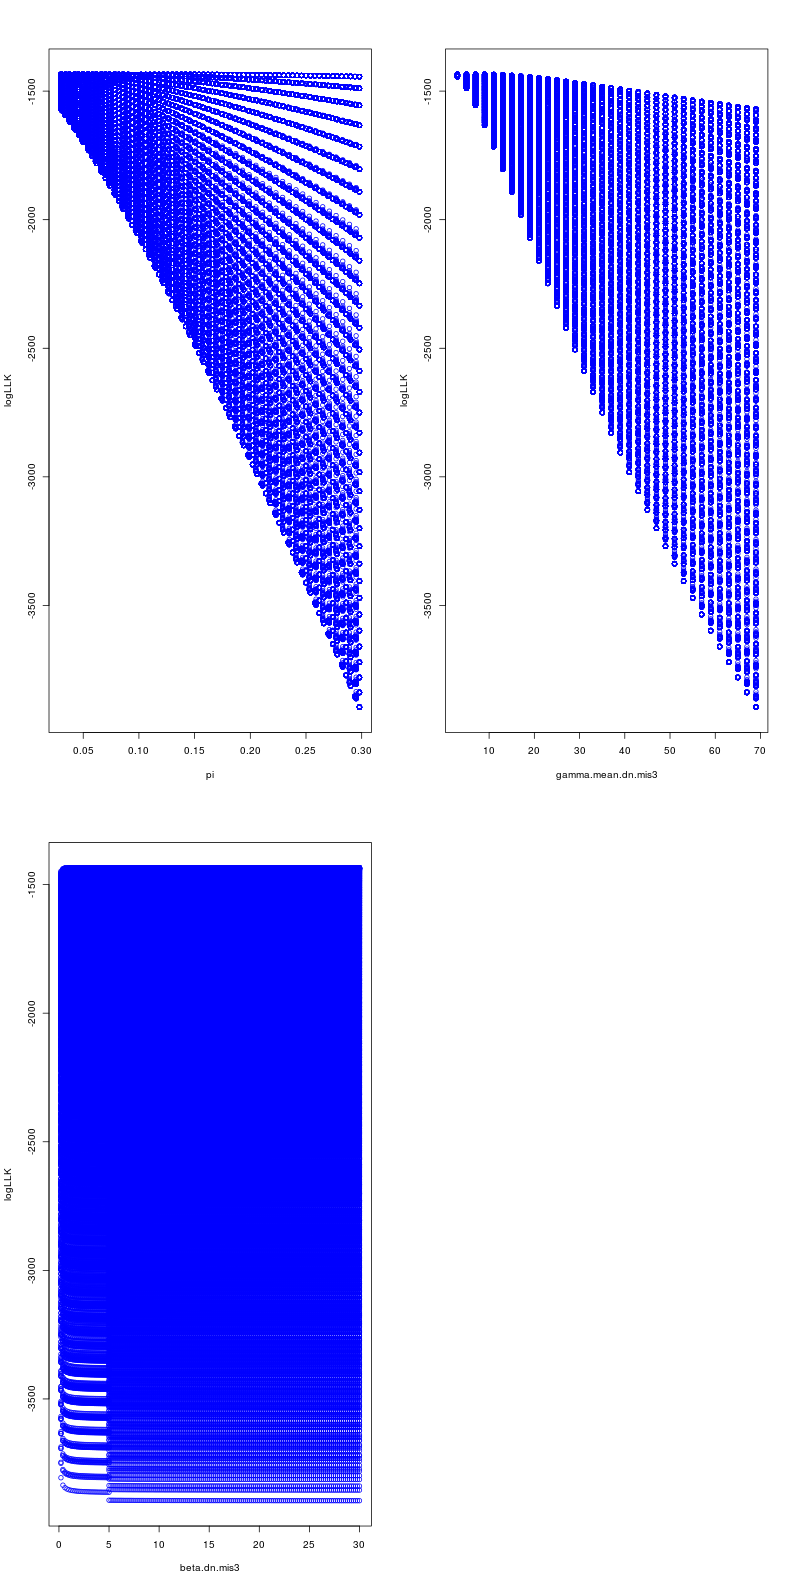

In [22]:
%%R -w 28 -h 56 -u cm


par(mfrow = c(2, 2))
for (ii in 1:(cLLK1 -1)){
    plot(d.cc.mis3.1[[ii]], d.cc.mis3.1[[cLLK1]], xlab = nameCol[ii], ylab = 'logLLK', col = 'blue')
}

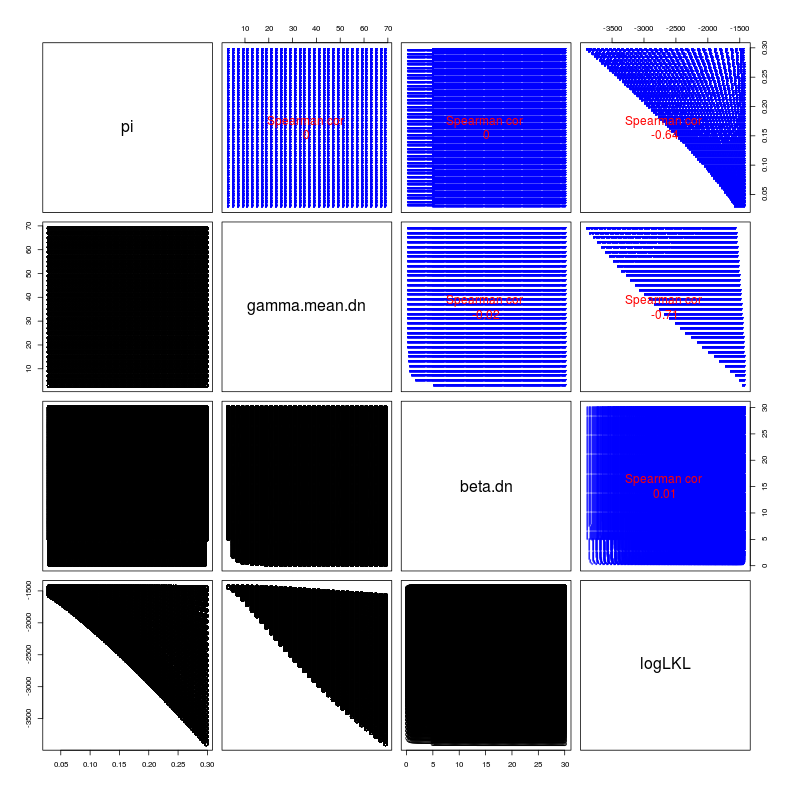

In [23]:
%%R -w 28 -h 28 -u cm

textPanel <- function(x, y) {
    tText <- paste("Spearman cor \n", round(cor(x, y, method = "spearman"), 2), sep = "")
    text(x, y, "*", lwd = 0.5, cex = 0.8, col = 'blue')
    text(mean(range(x)), mean(range(y)), tText , cex = 1.5, lwd = 2, col = 'red')
}

pairs(d.cc.mis3.1, labels = colNames, upper.panel = textPanel)

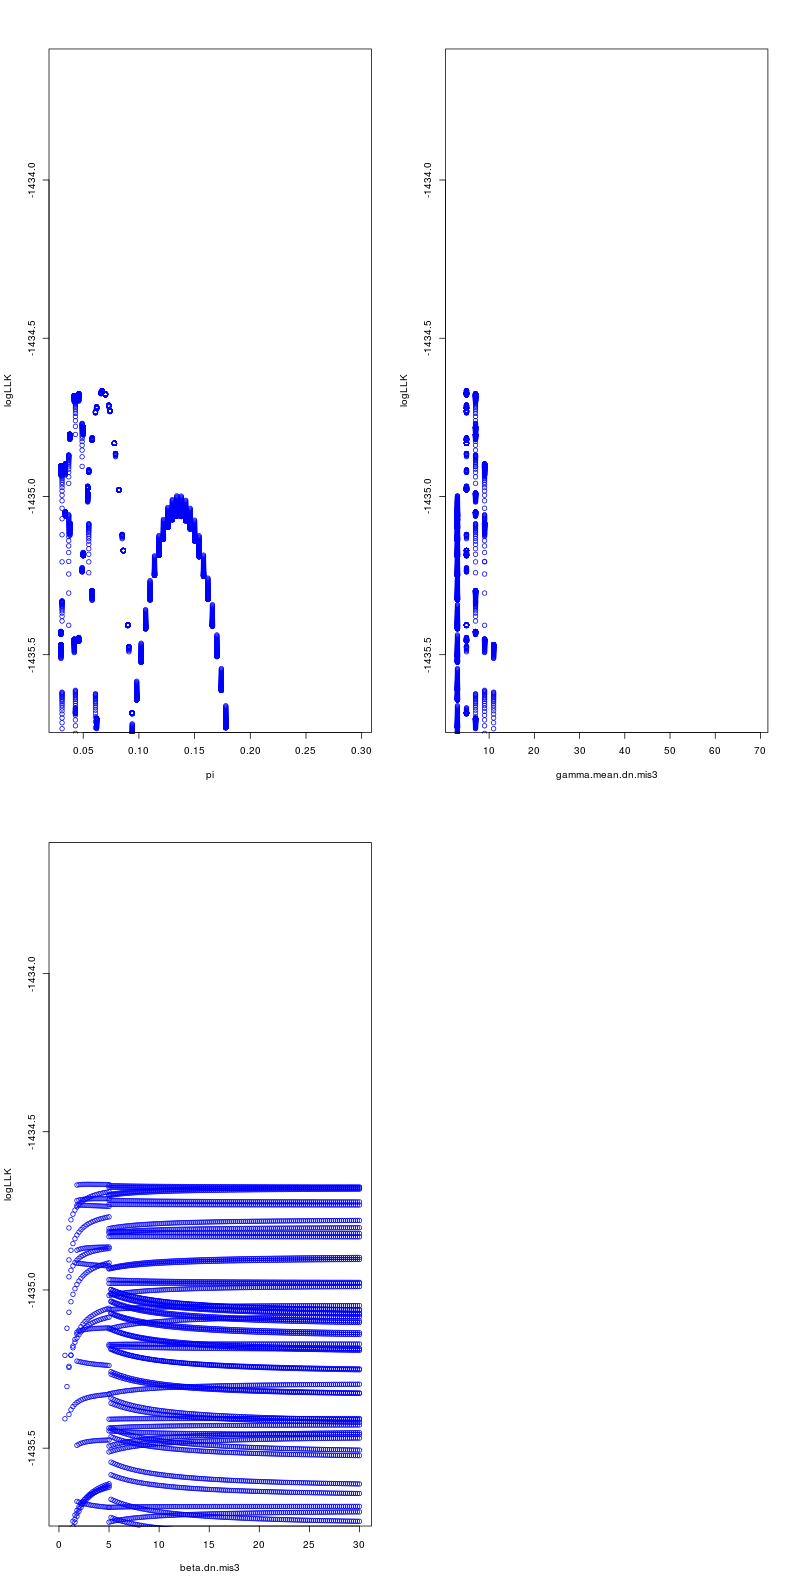

In [31]:
%%R -w 28 -h 56 -u cm
uLimit <- max(d.cc.mis3.1[[cLLK1]]) + 1
lLimit <- uLimit - 2
d.cc.mis3.2 <- d.cc.mis3.1[V4 >= lLimit]
cLLK <- cLLK1
par(mfrow = c(2, 2))
for (ii in 1:(cLLK1 -1)){
    plot(d.cc.mis3.1[[ii]], d.cc.mis3.1[[cLLK1]], xlab = nameCol[ii], ylab = 'logLLK', 
         ylim = c(lLimit, uLimit), col= 'blue')
}

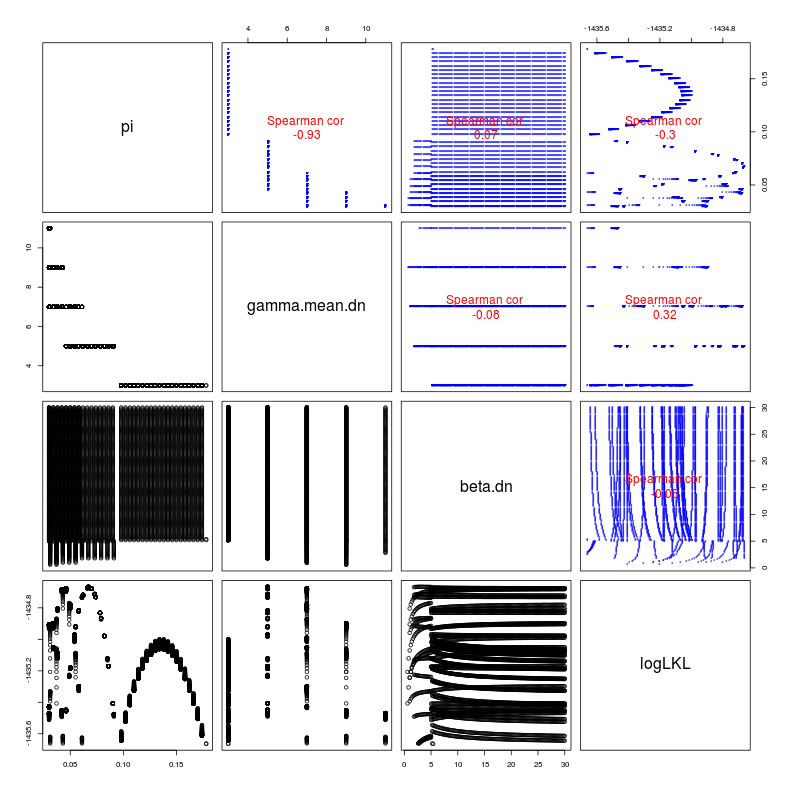

In [32]:
%%R -w 28 -h 28 -u cm

textPanel <- function(x, y) {
    tText <- paste("Spearman cor \n", round(cor(x, y, method = "spearman"), 2), sep = "")
    text(x, y, "*", lwd = 0.5, cex = 0.8, col = 'blue')
    text(mean(range(x)), mean(range(y)), tText , cex = 1.5, lwd = 2, col = 'red')
}

pairs(d.cc.mis3.2, labels = colNames, upper.panel = textPanel)

In [33]:
%%R

d.cc.mis3.1[order(-V4)]

           V1 V2   V3        V4
     1: 0.067  5  3.0 -1434.666
     2: 0.067  5  2.8 -1434.666
     3: 0.067  5  3.2 -1434.666
     4: 0.067  5  3.4 -1434.666
     5: 0.067  5  2.6 -1434.666
    ---                        
327510: 0.298 69 29.2 -3895.691
327511: 0.298 69 29.4 -3895.693
327512: 0.298 69 29.6 -3895.696
327513: 0.298 69 29.8 -3895.699
327514: 0.298 69 30.0 -3895.702


###Use beta.dn = 1

In [34]:
%%R
d.cc.mis3.2 <- d.cc.mis3[(V3 <= 1.3) & (V3>=0.8)]

#d.cc.mis3.1 <- d.cc.mis3.1[V4/V5 <= V6/V7]

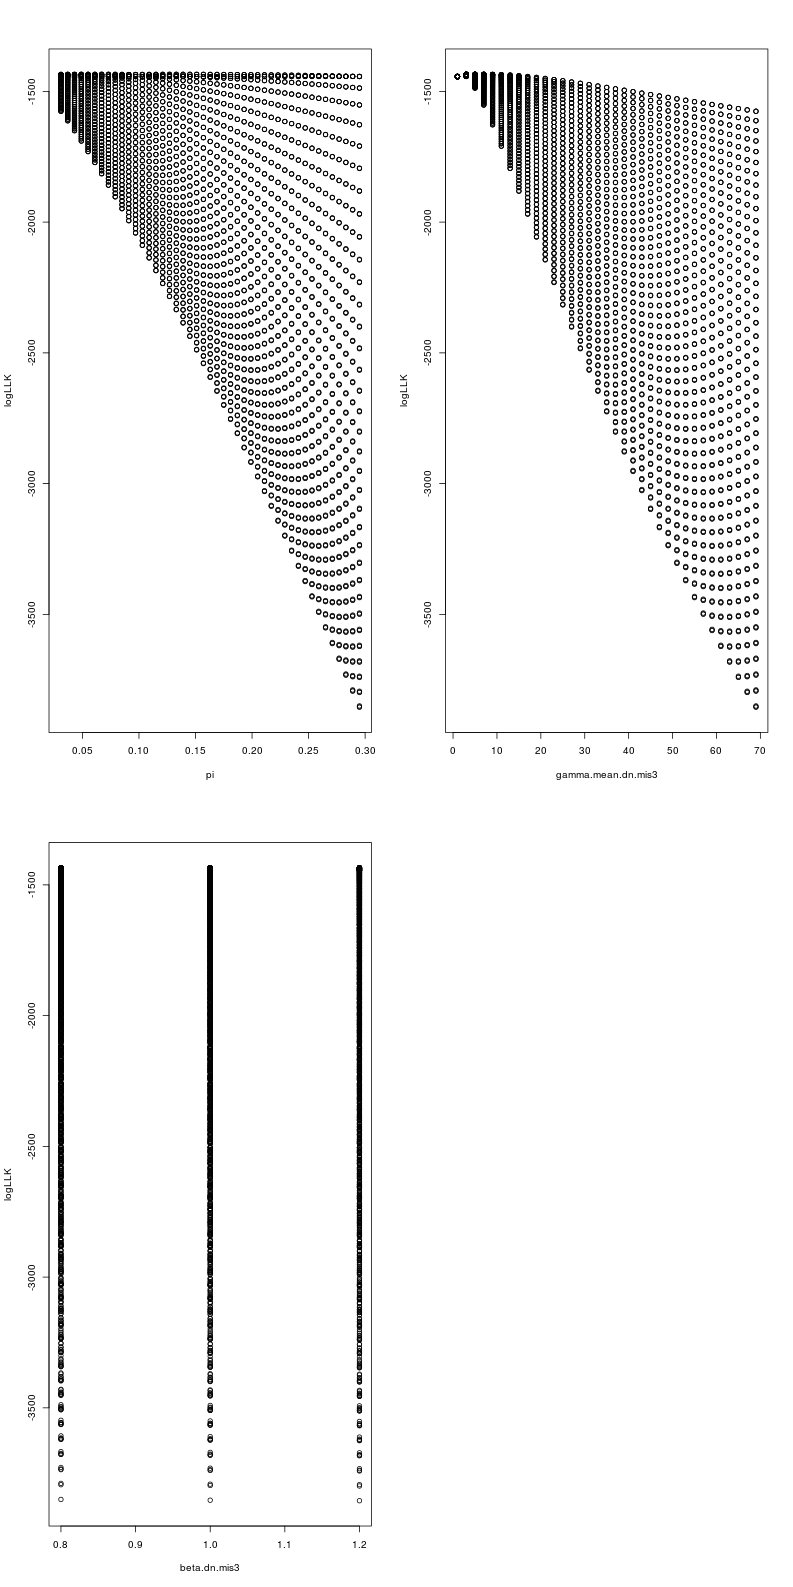

In [35]:
%%R -w 28 -h 56 -u cm


par(mfrow = c(2, 2))
for (ii in 1:(cLLK -1)){
    plot(d.cc.mis3.2[[ii]], d.cc.mis3.2[[cLLK]], xlab = nameCol[ii], ylab = 'logLLK')
}

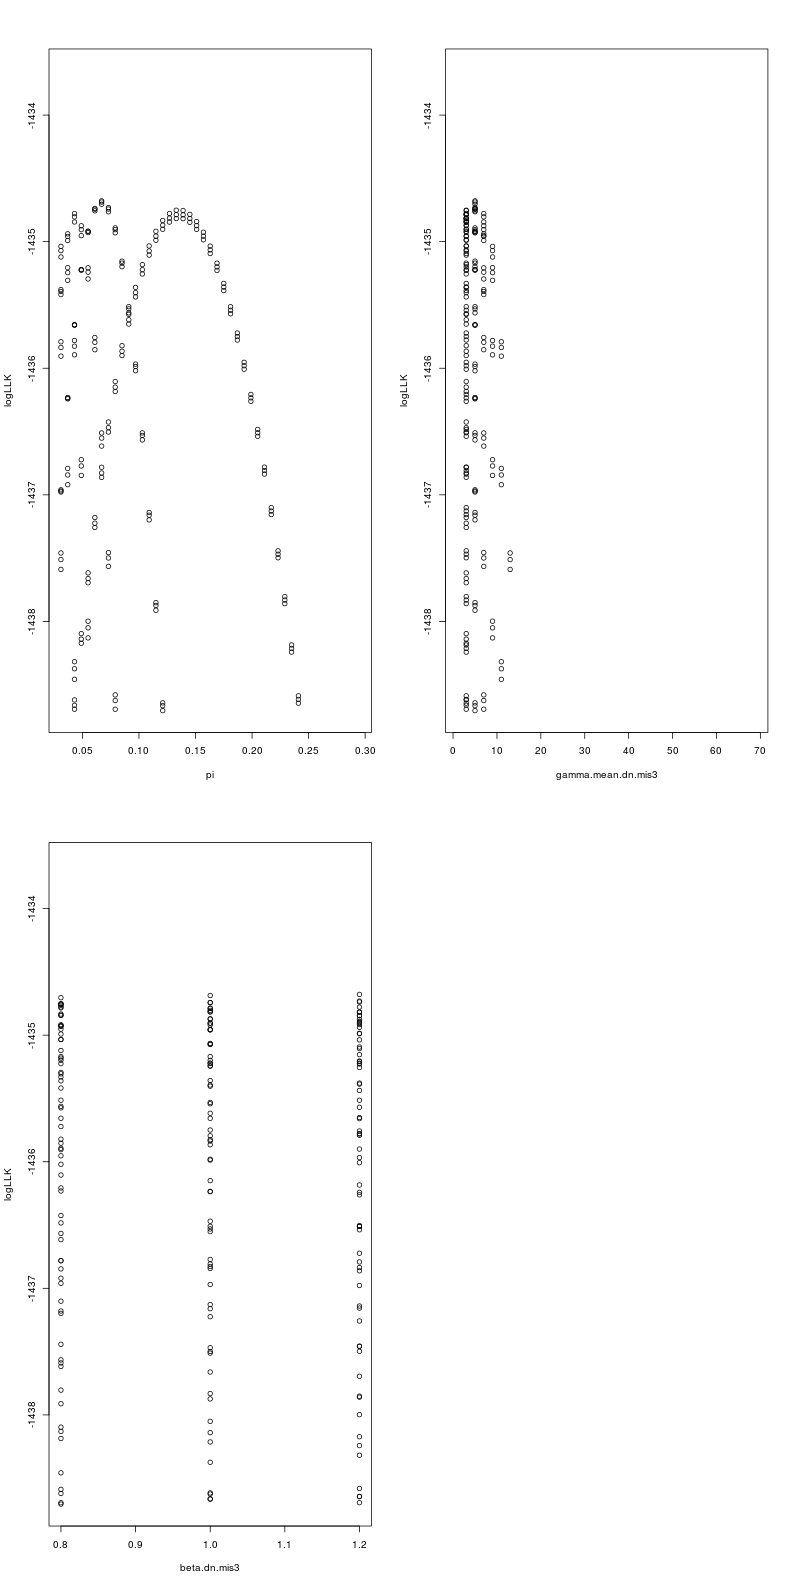

In [36]:
%%R -w 28 -h 56 -u cm
uLimit <- max(d.cc.mis3.2[[cLLK]]) + 1
lLimit <- uLimit - 5

par(mfrow = c(2, 2))
for (ii in 1:(cLLK -1)){
    plot(d.cc.mis3.2[[ii]], d.cc.mis3.2[[cLLK]], xlab = nameCol[ii], ylab = 'logLLK', ylim = c(lLimit, uLimit))
}